# 3. Searching and Sorting Algorithms
by Marcel Siegmann, 2020

TABLE OF CONTENTS


* [Search Algorithms](#search)
    * [Random Search](#random_search)
    * [Linear Search](#linear_search)
    * [Binary Search](#binary_search)
    * [Comparisons](#compare)
* [Sorting Algorithms](#sort)
    * [Bubble Sort](#bubble_sort)
    * [Selection Sort](#selection_sort)
    * [Quick Sort](#quick_sort)
* [References](#references)

## Search Algorithms
<div id="search"></div>

Searching algorithms are used to find a specific element in any data structure. The search algorithms can generally classified into two categories:
* Sequential Search: In this, the list or array is traversed sequentially and every element is checked. For example: Linear Search.
* Interval Search: These algorithms are made for searching through sorted data structures. They are much more efficient than Linear Search as "they repeatedly target the center of the search structure and divide the search space in half". For Example: Binary Search. 

In [34]:
items_unsorted = [21, 1, 56, 66, 20, 84, 58, 75, 2, 12]
items_sorted = [1, 2, 12, 20, 21, 56, 58, 66, 75, 84]

### Random Search
<div id="random_search"></div>

Random Search is probably one of the simplest ways of finding an element in a data structure. The algorithm just picks a random number from the list and checks if it is the element we ware looking for. When running the algorithm it seems to be not too slow but actually this is the algorithm with the worst time complexity __O(∞)__. In the worst case it will never find the element we are looking for.

In [17]:
import random

def random_search(items, value):
    while True:
        random_element = random.choice(items)
        if random_element == value:
            return random_element

random_search(items_unsorted, 20)

20

### Linear Search
<div id="linear_search"></div>

A linear search scans one item at a time. We start from the leftmost elment in the list and compare each element with the given value. If the value is in the list it will return the index, otherwise None. As the name suggests linear search has a linear time complexity if __O(n)__.

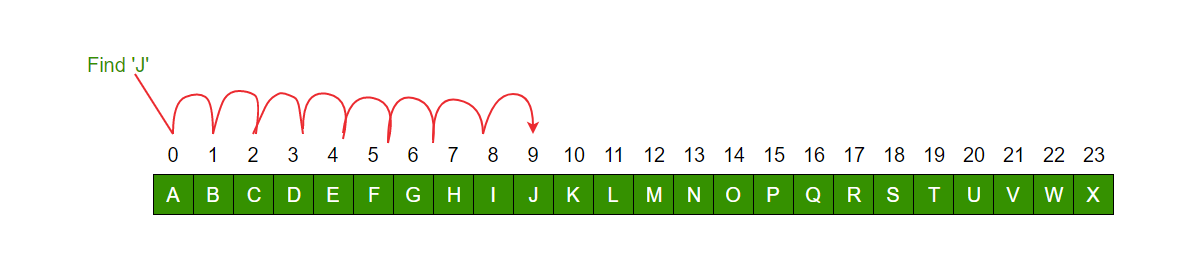

In [18]:
def linear_search(items, value):
    for index, item in enumerate(items):
        if item == value:
            return index
    return None

array = [1, 90, 15, 67, 19, 23, 25, 30]
linear_search(items_unsorted, 20)

(4, 20)

### Binary Search
<div id="binary_search"></div>

Binary Search is an interval search algorithm. For this type of search algorithm the elements need to be already sorted. It cuts the list into half and then checks if the value we are looking for is smaller or larger. By counting the steps you will find out that you need log(n) steps -> __O(log n)__.

I think, that this algorithm really shows that a well defined software architecture is really important. Binary Search is faster, but if we need to sort our algorithm beforehand, we might end up with a time complexity of __O(n²)__.

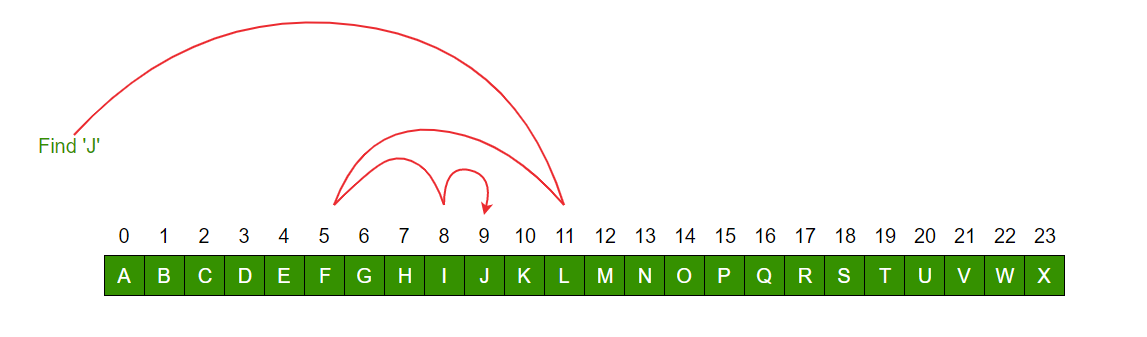

In [ ]:
def binary_search_iterative(array, element):
    mid = 0
    start = 0
    end = len(array)
    step = 0

    while (start <= end):
        step = step+1
        mid = (start + end) // 2

        if element == array[mid]:
            return mid

        if element < array[mid]:
            end = mid - 1
        else:
            start = mid + 1
    return -1


binary_search_iterative(items_sorted, 12)

In [25]:
def binary_search_recursive(array, element, start=0, end=None):
    mid = (start + end) // 2
    if element == array[mid]:
        return mid

    if element < array[mid]:
        return binary_search_recursive(array, element, start, mid-1)
    else:
        return binary_search_recursive(array, element, mid+1, end)

binary_search_recursive(items_sorted, 12, end=len(items_sorted))

2

Above you can see two very different implementations of the binary search. One is using a loop based structure and the second algorithm is using a recusive structure. Recursion means, that the function is able to call itself again. Depending on your programming language recursion is slower than a loop based algorithm, but sometimes it is easier to understand and to read. In binary_search_recursive we first define the middle and then use the middle as a new starting point for start or end, depending on the value of the element.


## Sorting Algorithms
<div id="sort"></div>

In a sorting algorithm you change the order of the elements in an array, depending on a constraint you define. e.g.:
* Sort numbers from low to high
* Sort numbers from high to low
* Sort strings by alphabetical order 

### Bubble Sort
<div id="bubble_sort"></div>

Bubble sort is an algorith where you start with the first element and then check if it is higher or lower than the next number. If higher, the numbers will be swapped and you continue from this index on. After one iteration the highest number is in the last position and you can reduce the number of loops by 1.
Thus we need to perform ((n-1)n)/2 comparisons

\begin{align}
O(n * n-1 * n-2 * n-3 * ... n-n) => O((n-1)n)/2 => O(n^2)
\end{align}

In [39]:
def bubbleSort(arr): 
    n = len(arr) 
    for i in range(n-1):
        for j in range(0, n-i-1): 
            if arr[j] > arr[j+1] : 
                print(arr)
                arr[j], arr[j+1] = arr[j+1], arr[j] 
                print("swap index", j, "with index", j+1)
                print(arr)
                print("\n")
            else:
                print(arr)
                print(arr[j], "<", arr[j+1])
                print("do not swap index", j, "with index", j+1, "\n")
        print("next round")
    return arr

new_array = items_unsorted.copy()
print(bubbleSort(new_array))

[21, 1, 56, 66, 20, 84, 58, 75, 2, 12]
swap index 0 with index 1
[1, 21, 56, 66, 20, 84, 58, 75, 2, 12]


[1, 21, 56, 66, 20, 84, 58, 75, 2, 12]
21 < 56
do not swap index 1 with index 2 

[1, 21, 56, 66, 20, 84, 58, 75, 2, 12]
56 < 66
do not swap index 2 with index 3 

[1, 21, 56, 66, 20, 84, 58, 75, 2, 12]
swap index 3 with index 4
[1, 21, 56, 20, 66, 84, 58, 75, 2, 12]


[1, 21, 56, 20, 66, 84, 58, 75, 2, 12]
66 < 84
do not swap index 4 with index 5 

[1, 21, 56, 20, 66, 84, 58, 75, 2, 12]
swap index 5 with index 6
[1, 21, 56, 20, 66, 58, 84, 75, 2, 12]


[1, 21, 56, 20, 66, 58, 84, 75, 2, 12]
swap index 6 with index 7
[1, 21, 56, 20, 66, 58, 75, 84, 2, 12]


[1, 21, 56, 20, 66, 58, 75, 84, 2, 12]
swap index 7 with index 8
[1, 21, 56, 20, 66, 58, 75, 2, 84, 12]


[1, 21, 56, 20, 66, 58, 75, 2, 84, 12]
swap index 8 with index 9
[1, 21, 56, 20, 66, 58, 75, 2, 12, 84]


next round
[1, 21, 56, 20, 66, 58, 75, 2, 12, 84]
1 < 21
do not swap index 0 with index 1 

[1, 21, 56, 20, 66, 58, 75

### Selection Sort
<div id="selection_sort"></div>

Selection sort is an algorithm, where we loop through the whole array to find the smallest element in the list and swap it with the first element. As we know now that index 0 is the smallest number, we can iterate from index one on to find the second smallest number and swap it with index 1. This continues till the complete array is sorted. Selection sort has __O(n²)__ in the best and worst case. 

Addiotionally you can see, that there were no additional initialisation of another array for selection sort and for bubble sort. Therefor the space complexity is __O(1)__.

In [31]:
def selection_sort(arr):
    # Traverse through all array elements 
    for i in range(len(arr)): 

        # Find the minimum element in remaining unsorted array 
        min_idx = i 
        for j in range(i+1, len(arr)): 
            if arr[min_idx] > arr[j]: 
                min_idx = j 
                
        print(range(i+1, len(arr)))

        # Swap the found minimum element with the first element 
        print("unswapped", arr)
        print("swap index", i, "with index", min_idx)
        arr[i], arr[min_idx] = arr[min_idx], arr[i] 
        print("swapped", arr, "\n")
    
    return arr

new_array = items_unsorted.copy()
selection_sort(new_array)

range(1, 7)
unswapped [64, 34, 25, 12, 22, 11, 90]
swap index 0 with index 5
swapped [11, 34, 25, 12, 22, 64, 90] 

range(2, 7)
unswapped [11, 34, 25, 12, 22, 64, 90]
swap index 1 with index 3
swapped [11, 12, 25, 34, 22, 64, 90] 

range(3, 7)
unswapped [11, 12, 25, 34, 22, 64, 90]
swap index 2 with index 4
swapped [11, 12, 22, 34, 25, 64, 90] 

range(4, 7)
unswapped [11, 12, 22, 34, 25, 64, 90]
swap index 3 with index 4
swapped [11, 12, 22, 25, 34, 64, 90] 

range(5, 7)
unswapped [11, 12, 22, 25, 34, 64, 90]
swap index 4 with index 4
swapped [11, 12, 22, 25, 34, 64, 90] 

range(6, 7)
unswapped [11, 12, 22, 25, 34, 64, 90]
swap index 5 with index 5
swapped [11, 12, 22, 25, 34, 64, 90] 

range(7, 7)
unswapped [11, 12, 22, 25, 34, 64, 90]
swap index 6 with index 6
swapped [11, 12, 22, 25, 34, 64, 90] 



[11, 12, 22, 25, 34, 64, 90]

### Quick Sort
<div id="quick_sort"></div>

Quick sort is one of the most efficient sorting algorithms. You first need to select a pivot. As a convention you often pick the last element in the array. We compare our pivot with the first element in the array. It is an inplace sort. If the first element is bigger than the pivot, we move behind the pivot. For this inplacement we need some space for the element. Therefor we move the element in front of the pivot the to the position of the element we compared the pivot with.

In the worst case the algorithm has __O(n²)__. It happens when the array is already sorted. If the pivot is the highest number in the array you have to compare it to all other elements each iteration. In average it cuts the number of comparisons you need to do by splitting the array in half pretty much every time --> __O(n log n)__. 

In [40]:
def quicksort(array):
    """Sort the array by using quicksort."""

    less = []
    equal = []
    greater = []

    if len(array) > 1:
        pivot = array[0]
        for x in array:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            elif x > pivot:
                greater.append(x)
        print(array)
        return quicksort(less)+equal+quicksort(greater)
    else:
        return array
    
new_array = items_unsorted.copy()
print(quicksort(new_array))

[21, 1, 56, 66, 20, 84, 58, 75, 2, 12]
[1, 20, 2, 12]
[20, 2, 12]
[2, 12]
[56, 66, 84, 58, 75]
[66, 84, 58, 75]
[84, 75]
[1, 2, 12, 20, 21, 56, 58, 66, 75, 84]


__References__

https://realpython.com/binary-search-python/#linear-search

https://stackabuse.com/binary-search-in-python/

https://www.geeksforgeeks.org/searching-algorithms/

https://www.bigocheatsheet.com/